# Machine Learning Project : Web Page Traffic Prediction Part1 using SkLearn Python Library

Author :Navneet Chandra Tiwari

Email: navneet058@gmail.com

Website: www.techitskills.com

In this project, I am going to predict web page total hits per day based on past historical data

# Step 1
Import all the packages and read the data from excel file using pandas and doing some exploratory data analysis
Also install one more package xlrd for excel read using pandas using below command via pip

!pip install xlrd

In [7]:
#!pip install xlrd

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
traffic_data=pd.read_excel('data.xlsx')

In [12]:
#Read the first five records of the data frame
traffic_data.head()

,Returning User,New User,Page Loading Time(in sec),Total Hits(per day)
0,10,10,10,20
1,20,10,20,30
2,30,5,30,35
3,40,60,10,100
4,50,50,20,100


# Doing Some EDA(Exploratory Data Analysis)

In [14]:
#Check the shape of the data frame
traffic_data.shape

(19, 4)

In [17]:
#Get the Information of the data frame
traffic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
Returning User               19 non-null int64
New User                     19 non-null int64
Page Loading Time(in sec)    19 non-null int64
Total Hits(per day)          19 non-null int64
dtypes: int64(4)
memory usage: 672.0 bytes


In [23]:
#Check any missing value exits are not in a data frame
#So my data frame data is OK 
traffic_data[traffic_data.isnull()].count()

Returning User               0
New User                     0
Page Loading Time(in sec)    0
Total Hits(per day)          0
dtype: int64

In [25]:
#Calculate Some Statistical Information Using describe function
traffic_data.describe()


,Returning User,New User,Page Loading Time(in sec),Total Hits(per day)
count,19.000000,19.000000,19.000000,19.000000
mean,102.368421,53.157895,19.368421,155.526316
std,132.144370,109.775156,7.804632,225.572695
min,5.000000,5.000000,10.000000,10.000000
25%,30.000000,10.000000,10.000000,35.000000
50%,50.000000,30.000000,20.000000,100.000000
75%,100.000000,45.000000,25.000000,135.000000
max,500.000000,500.000000,30.000000,1000.000000


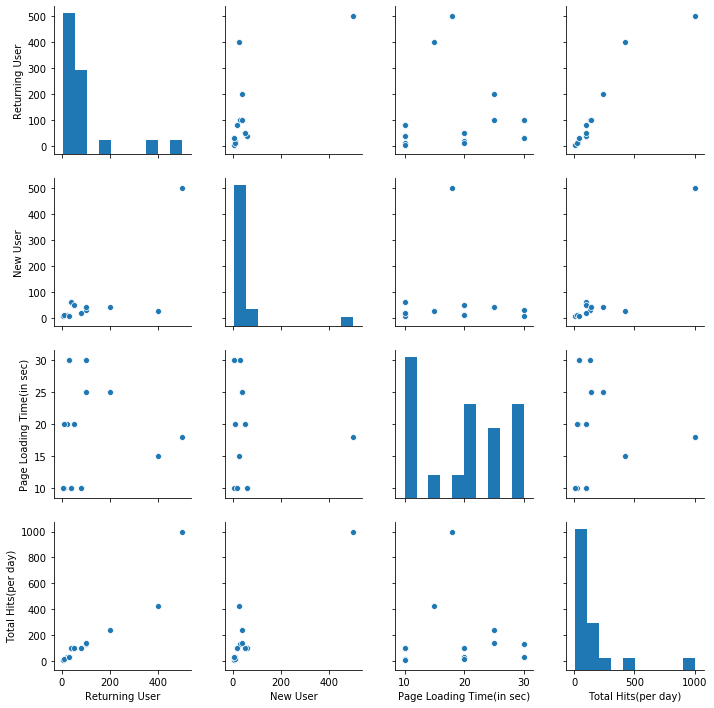

In [47]:
sns.pairplot(traffic_data)
plt.savefig('traffic_pair_plot.jpg')

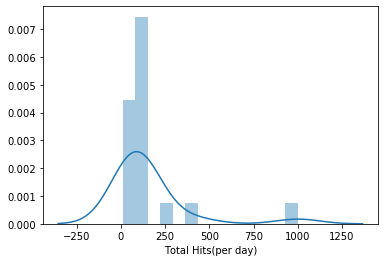

In [48]:
sns.distplot(traffic_data['Total Hits(per day)'])

# Step2

Now in second step i am going to seprate my target and feature variable 

Target Variable

1-Total Hits

=================================================

Feature Variables are

1-Returning User

2-New User

3-Page Loading Time

In [27]:
target_data=traffic_data['Total Hits(per day)']

In [28]:
target_data

0       20
1       30
2       35
3      100
4      100
5      130
6      100
7      140
8       10
9       20
10      35
11     100
12     100
13     130
14     100
15     140
16     240
17     425
18    1000
Name: Total Hits(per day), dtype: int64

In [30]:
feature_data=traffic_data.drop('Total Hits(per day)',axis=1)

In [31]:
feature_data

,Returning User,New User,Page Loading Time(in sec)
0,10,10,10
1,20,10,20
2,30,5,30
3,40,60,10
4,50,50,20
5,100,30,30
6,80,20,10
7,100,40,25
8,5,5,10
9,10,10,20


# Step 3
In step 3 ,I am going to build and train the linear regression model using sklearn library

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [33]:
#This function split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(feature_data,target_data,test_size=0.3,random_state=101)

In [34]:
#Then Import Linear Regression Model
lm=LinearRegression()

In [37]:
#Now fit or train the linear regression model using fit method
lm.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
#Now my model is ready for prediction ,So let's start 
predicted_data=lm.predict(X_test)

In [40]:
predicted_data

array([100., 100.,  30.,  35.,  20., 240.])

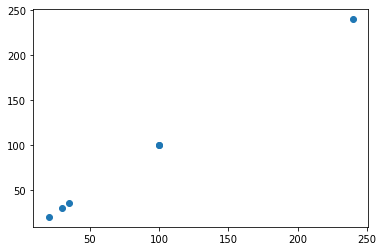

In [60]:
#Now visaulize the actual data vs predicted data using scatter plot

plt.scatter(y_test,predicted_data)
plt.savefig('linear_regression.jpg')

In [52]:
#Now the above figure shows the linear regression model

# Step 4 -Model Evaluation and Validation
Now in fourth step,I am going to evaluate the performance of linear regression using

1-Mean Absolute Error (MAE) is the mean of the absolute value of the errors:


 
2-Mean Squared Error (MSE) is the mean of the squared errors:


 
3-Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

 
Let's calculate these by hand


In [55]:
#Import metrics from sklearn
from sklearn import metrics

# calculate MAE, MSE, RMSE
print(metrics.mean_absolute_error(y_test, predicted_data))
print(metrics.mean_squared_error(y_test, predicted_data))
print(np.sqrt(metrics.mean_squared_error(y_test, predicted_data)))

1.7763568394002505e-14
5.595653354367711e-28
2.3655133384463743e-14


In [59]:
#The Following o/p shows less error so linear regession model is accurate with minimum error

#So in my next article,i am going to predict this model with other supervised machine learning models.So keep waiting for the next article.

#Thanks  
